In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

In [62]:
train_path= "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
test_path= "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"
os.listdir(train_path)

['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']

In [63]:
class_paths= []
for file in os.listdir(train_path):
    class_paths.append(os.path.join(train_path,file))
class_paths

['../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented',
 '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented',
 '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented',
 '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented']

In [64]:
len(class_paths)

4

In [65]:
mildD= class_paths[3]
modeD= class_paths[0]
nonD= class_paths[1]
vmilD= class_paths[2]

In [66]:
mildD

'../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented'

In [67]:
def show_rand_img(path):
#     num= np.random.randint(len(os.listdir(path)))
#     img= plt.imread(os.path.join(path, os.listdir(path)[num]))
#     plt.imshow(img)
#     plt.title(os.listdir(path)[num])
#     print(img.shape)
    plt.figure(figsize=(12,4))
    for i in range(5):
        file = np.random.choice(os.listdir(path))
        image_path= os.path.join(path, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,5,i+1)
        ax.title.set_text(file)
        plt.tight_layout()
        plt.imshow(img)
        print(img.shape)

# **visualize the Images**

# 1. Mild Demented


(208, 176)
(208, 176)
(208, 176)
(208, 176)
(208, 176)


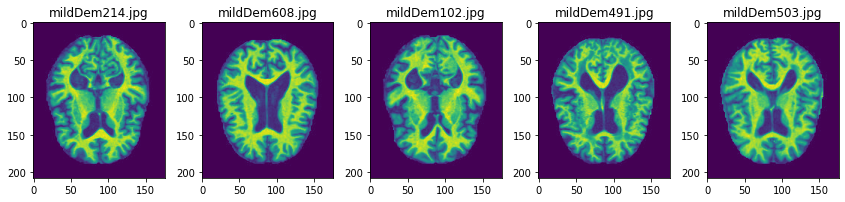

In [68]:
show_rand_img(mildD)

# 2. Moderate Demented

(208, 176)
(208, 176)
(208, 176)
(208, 176)
(208, 176)


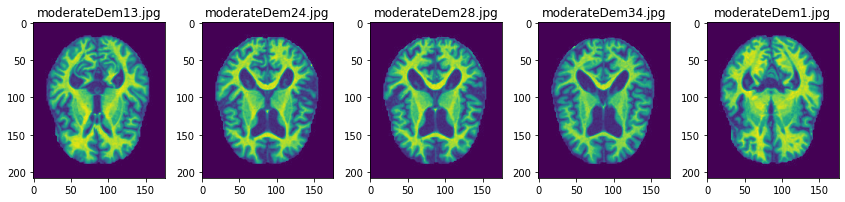

In [69]:
show_rand_img(modeD)

# 3. Non Demented

(208, 176)
(208, 176)
(208, 176)
(208, 176)
(208, 176)


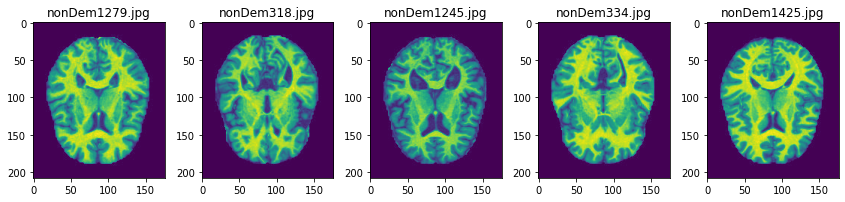

In [70]:
show_rand_img(nonD)

# 4. Very Mild Demented

(208, 176)
(208, 176)
(208, 176)
(208, 176)
(208, 176)


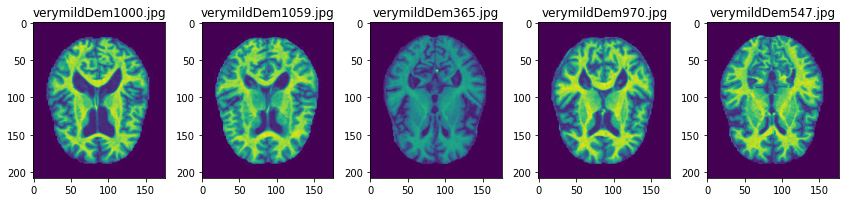

In [71]:
show_rand_img(vmilD)

In [72]:
from tqdm import tqdm
images= []
labels= []
for f in tqdm(class_paths):
    for im in os.listdir(f):
        image= plt.imread(os.path.join(f,im))
        image= np.array(image)
        image= np.stack((image,)*3, axis=-1)
        images.append(image)
        labels.append(f.split("/")[-1])
    print("Done")

  0%|          | 0/4 [00:00<?, ?it/s]

Done


 50%|█████     | 2/4 [00:02<00:02,  1.30s/it]

Done


 75%|███████▌  | 3/4 [00:04<00:01,  1.46s/it]

Done


100%|██████████| 4/4 [00:04<00:00,  1.24s/it]

Done


In [73]:
# del images, labels

In [74]:
len(os.listdir(mildD))

717

In [75]:
len(os.listdir(modeD))

52

In [76]:
len(os.listdir(nonD))

2560

In [77]:
len(os.listdir(vmilD))

1792

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input
from keras.optimizers import RMSprop
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

In [79]:
IMG_SIZE= (208, 176)

In [80]:
im= np.array(images)
im.shape

(5121, 208, 176, 3)

In [81]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
lbls= le.fit_transform(labels)
lbls= to_categorical(lbls)
lbl = np.array(lbls)

In [82]:
lbl= lbl.reshape(-1,4)

In [83]:
from keras.applications.vgg16 import VGG16
vgg16= VGG16(include_top=False, weights="imagenet")

In [87]:
inputs= Input(shape=im.shape[1:])
x= vgg16(inputs)
# x= Flatten()(x)
# x= Dense()
x= Dropout(0.2)(x)
x= Dense(16)(x)
x= Flatten()(x)
x= Dense(8)(x)
output= Dense(4, activation= "softmax")(x)

In [88]:
import keras
model= keras.Model(inputs=inputs, outputs=output, name= "first_model")
model.summary()

Model: "first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 208, 176, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 5, 512)         0         
_________________________________________________________________
dense_29 (Dense)             (None, 6, 5, 16)          8208      
_________________________________________________________________
flatten_6 (Flatten)          (None, 480)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 3848      
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 

In [89]:
model.compile(loss= keras.losses.CategoricalCrossentropy(),
             optimizer= keras.optimizers.Adam(learning_rate=0.00001),
             metrics=['accuracy'])

In [90]:
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(min_delta=0.00001, patience=3, restore_best_weights=True, monitor="val_loss")

In [91]:
history= model.fit(im, lbl, batch_size=32, epochs= 50, use_multiprocessing=True, callbacks=early_stop, validation_split=0.2)

Epoch 1/50
128/128 [==============================] - 418s 3s/step - loss: 5.1066 - accuracy: 0.4890 - val_loss: 3.7411 - val_accuracy: 0.2000
Epoch 2/50
128/128 [==============================] - 415s 3s/step - loss: 0.6091 - accuracy: 0.7071 - val_loss: 4.3137 - val_accuracy: 0.1668
Epoch 3/50
128/128 [==============================] - 415s 3s/step - loss: 0.4908 - accuracy: 0.7736 - val_loss: 4.6884 - val_accuracy: 0.2146
Epoch 4/50
128/128 [==============================] - 415s 3s/step - loss: 0.3476 - accuracy: 0.8503 - val_loss: 5.5141 - val_accuracy: 0.2429


In [ ]:
def plot_history(history):
    fig, ax= plt.subplots(2)
    history= history.history
    # accuracy plot
    ax[0].plot(history["accuracy"])
    ax[0].plot(history["val_accuracy"])
    
    #losses plot
    ax[1].plot(history["loss"])
    ax[1].plot(history["val_loss"])

plot_history(history)